In [2]:
import pandas as pd

In [3]:
dfc = pd.read_csv('../EASIER/data/Gide_pipe_clinical.csv',sep = ',', index_col=0)

In [6]:
dfs = pd.read_csv('./results/Gide_EMS_output.csv', index_col=0, header=None)
dfs.columns = ['ENLIGHT']

In [ ]:
df = dfc.join(dfs)
df.head()

In [9]:
df.set_index('Index')[['ENLIGHT']].to_csv('./results/Gide_EMS_score.csv')

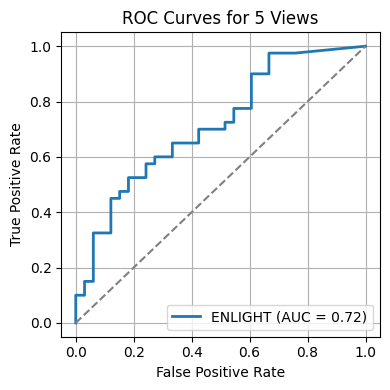

In [10]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 将响应标签转换为二进制标签
df['label_bin'] = df['response_label'].map({'R': 1, 'NR': 0})

# 初始化绘图
plt.figure(figsize=(4, 4))

# 为每一列绘制 ROC 曲线
for col in ['ENLIGHT']:
    fpr, tpr, _ = roc_curve(df['label_bin'], df[col])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{col} (AUC = {roc_auc:.2f})')

# 添加对角线、图例等
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for 5 Views')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()